In [1]:
#import cell

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
import scipy
from scipy import fftpack as fft
from scipy.io import wavfile as wav
from scipy import signal as sig
import decimal as dec

C:\Users\izfan\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\izfan\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\izfan\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: ComplexWarning: Casting complex values to real discards the imaginary part


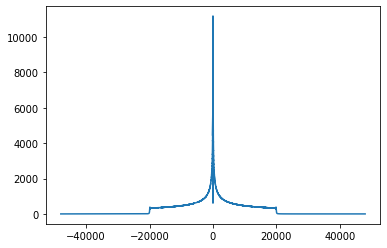

<Figure size 432x288 with 0 Axes>

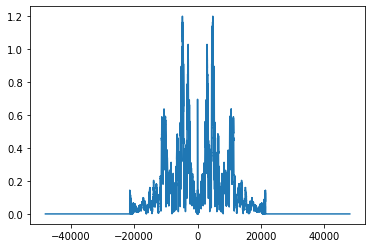

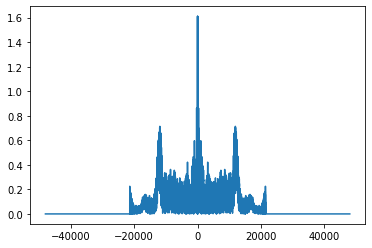

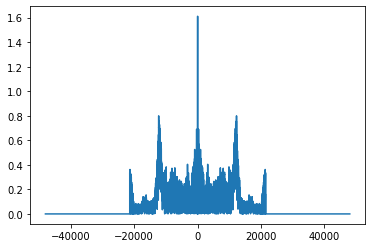

In [60]:
#import wav file for the pure sine sweep, guitar sine sweep, and room sine sweep.

fs, sine_sweep = wav.read('Sine Sweep.wav')
fs, guitar_sweep = wav.read('Guitar IR Sweep.wav')
fs, room_sweep_r = wav.read('Room IR Sweep Right.wav')
fs, room_sweep_l = wav.read('Room IR Sweep Left.wav')

pad_sine = np.zeros(2**20 - len(sine_sweep))
pad_guitar = np.zeros(2**20 - len(guitar_sweep))
pad_room = np.zeros(2**20 - len(room_sweep_r))

sine_sweep = np.concatenate([sine_sweep, pad_sine])
guitar_sweep = np.concatenate([guitar_sweep, pad_guitar])
room_sweep_r = np.concatenate([room_sweep_r, pad_room])
room_sweep_l = np.concatenate([room_sweep_l, pad_room])


#Guitar_sweep = Y[n]
#Sine_sweep = X[n]



#Transforming both through the FFT will give us Y(jw) and X(jw) respectively.
#Through this we can try to obtain the impulse response transform H(jw) through Y(jw)/X(jw)

fn_fft = np.linspace(-fs/2, fs/2, len(sine_sweep))
sine_fft = fft.fft(sine_sweep)
guitar_fft = (fft.fft(guitar_sweep))
room_l_fft = (fft.fft(room_sweep_l))
room_r_fft = (fft.fft(room_sweep_r))

plt.plot(fn_fft, np.abs(fft.fftshift(sine_fft)))

plt.figure()

def find_IR(y, x):
    for i in range(0, len(x)):
        if(np.abs(x[i]) < 4.5): #Filter out near 0 frequencies on the pure sine sweep. This eliminates noise.
            x[i] = 100000000
    
    ir_fft = y/x
    plt.figure()
    plt.plot(fn_fft, np.abs(fft.fftshift(ir_fft)))
    toreturn = fft.ifft(ir_fft)
    return toreturn    

guitar_ir = find_IR(guitar_fft, sine_fft)
room_l_ir = find_IR(room_l_fft, sine_fft)
room_r_ir = find_IR(room_r_fft, sine_fft)
#n = np.arange(0, abs(2**20 / fs), 1/fs)

wav.write('Guitar IR.wav', fs, guitar_ir.astype('float'))
wav.write('Room IR Left.wav', fs, room_l_ir.astype('float'))
wav.write('Room IR Right.wav', fs, room_r_ir.astype('float'))




In [2]:
#All encapsulating function
def create_IR_wav(name_sweep, name_sine, name_out, sample_length=2**20):
    '''Function will take in 3 names, and output
    the impulse response derived from the deconvolution
    
    Arguments:
    name_sweep: the sweep signal of the impulse response that needs to be derived, y[n]
    name_sine: name of the pure sine sweep, x[n]
    name_out: the name of the output file that will be the impulse response derived
    sample_length: desired sample length to extend (pad with 0s) the signal. Recommended to be powers of 2.
    
    Returns nothing
    '''
    #Read the required wav files
    fs, y_signal = wav.read(name_sweep)
    fs, x_signal = wav.read(name_sine)
    
    #pad the wav files
    pad_y = np.zeros(sample_length - len(y_signal))
    pad_x = np.zeros(sample_length - len(x_signal))
    
    y_signal = np.concatenate([y_signal, pad_y])
    x_signal = np.concatenate([x_signal, pad_x])
    
    #Derive the fourier transforms using fft
    y_fft = fft.fft(y_signal)
    x_fft = fft.fft(x_signal)
    
    for i in range(0, len(x_fft)):
        if(np.abs(x_fft[i]) < 4.5): #Filter out near 0 frequencies on the pure sine sweep. This eliminates noise.
            x_fft[i] = 100000000
    
    ir_fft = y_fft/x_fft
    ir_output = fft.ifft(ir_fft)
    
    wav.write(name_out, fs, ir_output.astype('float'))
    return

#test the function
create_IR_wav('Guitar IR Sweep EQ.wav', 'Sine Sweep.wav', 'Guitar IR EQ.wav')
    

/usr/local/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
